In [1]:
import pandas as pd
import warnings

import plotly.graph_objects as go
import plotly.express as px
warnings.simplefilter('ignore')

In [2]:
%pwd

'z:\\home\\02_업무\\감사실민원분석'

In [2]:
mw = pd.read_parquet('전처리/콜_도로시설.parquet')
jm = pd.read_parquet('전처리/전자_도로시설.parquet')

In [9]:
mw[mw['소분류'] != 'nan'].groupby([mw['일자'].dt.year, '중분류', '소분류'])\
    .size().reset_index()\
    .pivot_table(index=['중분류', '소분류'], columns='일자', aggfunc='sum', values=0)\
    .reset_index().sort_values(['중분류', 2023], ascending=[True, False])

일자,중분류,소분류,2021,2022,2023
2,도로,노면파임,3009,4351,5835
4,도로,주행감,709,819,1070
1,도로,기타,339,473,556
5,도로,차선도색,283,333,360
3,도로,물고임,86,105,218
0,도로,IC개량,13,9,14
7,시설,기타시설물,561,734,873
13,시설,전기시설,475,497,560
14,시설,터널,308,312,397
16,시설,표지판,306,369,332


In [53]:
jm[jm['소분류'] != 'nan'].groupby([jm['일자'].dt.year, '중분류', '소분류'])\
    .size().reset_index()\
    .pivot_table(index=['중분류', '소분류'], columns='일자', aggfunc='sum', values=0)\
    .reset_index().sort_values(['중분류', 2023], ascending=[True, False])

일자,중분류,소분류,2021,2022,2023
2,도로,노면파임,159,765,1327
1,도로,기타,924,543,533
4,도로,주행감,103,246,306
5,도로,차선도색,86,207,217
3,도로,물고임,17,14,30
0,도로,IC개량,14,10,22
11,시설,안전시설,39,508,788
7,시설,기타시설물,149,312,528
9,시설,방음벽,279,643,512
16,시설,표지판,66,158,223


#### 📈 라인 차트


In [3]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [4]:
def call_layout(title: str, sub_title: str = '', width: int = 660, height: int = 330, margin: tuple[int, int, int, int] = (30, 40, 40, 40), footer: str = '', legend_title: str = '', unit: str = ''):

    if sub_title == '':
        titles = f'<b>{title}</b>'
    else:
        titles = f'<b>{title}</b><br><sup>{sub_title}</sup>'

    pio.templates["bloombug"] = go.layout.Template(
        # 대현 카피라이트
        layout_annotations=[
            dict(
                name="footer",
                text=footer,
                textangle=0,
                opacity=1,
                font=dict(color="black", size=10),
                xref="paper",
                yref="paper",
                x=0,
                y=-0.15,
                showarrow=False
            ),
            dict(
                name="unit",
                text=unit,
                textangle=0,
                opacity=0.9,
                font=dict(color="black", size=10),
                xref="paper",
                yref="paper",
                x=1,
                y=1,
                showarrow=False
            ),
        ],

        data={
            'scatter': [go.Scatter(texttemplate='%{text:,}', textposition='top center', mode='lines',
                                   line=dict(
                                       shape='spline', smoothing=0.25, width=3, color='black'),
                                   marker=dict(color='white', line=dict(width=0)), textfont={'size': 10, 'color': 'black'})],
            'treemap': [go.Treemap(textinfo="label+text+value+percent entry", texttemplate="%{label}<br>%{value:,.0f}건<br>%{percentEntry}", marker=dict(cornerradius=30), textfont=dict(size=20))],
            'bar': [go.Bar(textposition='outside')],
            'pie': [go.Pie(texttemplate="%{label}<br>%{value:,.1f}%", textposition='outside', marker=dict(line=dict(color='#FFFFFF', width=2)))]
        },

        layout=dict(
            width=width,
            height=height,
            margin=dict(r=margin[0], l=margin[1], t=margin[2], b=margin[3]),
            uniformtext=dict(minsize=12, mode='hide'),
            plot_bgcolor='rgba(256,256,256,1)',
            paper_bgcolor='rgba(256,256,256,1)',
            font=dict(family='G마켓 산스 TTF Medium', color='black'),
            hovermode='x unified',
            legend=dict(
                orientation='h',
                x=0, xanchor="left", xref='paper',
                y=0.98, yanchor='bottom', yref='paper',
                title_text=legend_title,
                bgcolor='rgba(230,230,230,0.3)'),

            title=dict(font_size=20, x=0, xref='paper', yref='container', y=0.95,
                       text=titles),

            xaxis=dict(title='', tickfont=dict(color='black', size=10), gridcolor='#e2e8eb',
                       linecolor='black', showticklabels=True, zeroline=True, ticks="outside"),
            yaxis=dict(
                title='',
                gridcolor='#e2e8eb',
                tickfont=dict(color='black'),
                ticklabelposition="inside",
                zeroline=True, side='right'),
        ),)

    return dict(template='bloombug', width=width, height=height, legend_title_text=legend_title)

In [166]:
# 콜센터 최근 3개년 유지보수 민원
temp = mw.groupby([pd.PeriodIndex(mw['일자'], freq='M').strftime('%Y년 %m월'), '중분류']
        ).size().reset_index().rename(columns={0: '건수'}).astype({'일자': 'str'})
fig = px.line(temp, x='일자', y='건수', line_group='중분류', color='중분류')

fig.update_traces(line=dict(color='black'), selector=dict(name='도로'))
fig.update_traces(line=dict(color='blue'), selector=dict(name='시설'))



fig.update_layout(template='bloombug',
        title='<b>최근 3개년 유지보수 민원</b><br><sup>콜센터</sup>',
        width=630, height=330, legend_title_text="",
        yaxis=dict(title='건', range=(0, 1500)),
        xaxis=dict(title='', tickvals=list(range(0, 36, 12)), ticktext=['2021년', '2022년', '2023년']))

fig.show()

In [173]:
# 전자 최근 3개년 유지보수 민원
temp = jm.groupby([pd.PeriodIndex(jm['일자'], freq='M').strftime('%Y년 %m월'), '중분류']
        ).size().reset_index().rename(columns={0: '건수'}).astype({'일자': 'str'})
fig = px.line(temp, x='일자', y='건수', line_group='중분류', color='중분류')

fig.update_traces(line=dict(color='black'), selector=dict(name='도로'))

fig.update_traces(line=dict(color='blue'), selector=dict(name='시설'))


fig.update_layout(template='bloombug',

        title='<b>최근 3개년 유지보수 민원</b><br><sup>전자·서면</sup>',

        width=630, height=330, legend_title_text="",

        yaxis=dict(title='건', range=(0, 500)),

        xaxis=dict(
    title='',

    tickvals=list(range(0, 36, 12)),

    ticktext=['2021년', '2022년', '2023년']
        ))


fig.show()

### 전체 건수


In [5]:
mw['소스'] = '콜센터'
jm['소스'] = '전자·서면'
jm = jm.rename(columns={'메모_전처리': '텍스트'})

In [6]:
import polars as pl
df = pl.read_parquet('data/유지보수민원_전체.parquet')
df = df.filter(pl.col('소분류') != 'nan')
dfd = df.filter(pl.col('텍스트').is_unique())

In [7]:
tr = pd.read_csv(
    '보고서/교통량.csv', parse_dates=['일자'], date_parser=lambda x: pd.to_datetime(x)).sort_values('일자')

### 유지보수 민원 발생 추이


In [181]:
from plotly.subplots import make_subplots

일자 = df['일자']
stat = df.groupby([pd.PeriodIndex(일자, freq='M')]).agg(
    건수=('텍스트', 'count')).reset_index().astype({'일자': 'str'})

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
    x=stat['일자'], y=stat['건수'], name='유지보수 민원'), secondary_y=True)

fig.add_trace(go.Scatter(x=tr['일자'], y=tr['교통량'],
    mode='lines', name='교통량'), secondary_y=False)

fig.update_traces(line=dict(color='blue'), selector=dict(name='유지보수 민원'))
fig.update_traces(line=dict(color='#404040'), selector=dict(name='교통량'))
fig.update_layout(template='bloombug',

        title='<b>교통량 대비 유지보수 민원발생 건수</b><br><sup></sup>',

        width=630, height=330, legend_title_text="",

        yaxis=dict(title='건', ),
        yaxis2=dict(title='건', side="left",
showgrid=False, range=(-100, 2500)),

        xaxis=dict(
    title='',
    tickmode="array",
    tickvals=[period.strftime(
        '%Y-%m') for period in pd.PeriodIndex(일자, freq='M').unique() if period.month == 1],

    ticktext=['2021년', '2022년', '2023년']
        ))


fig.show()

In [10]:
from datetime import date
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

temp = df.groupby([pl.col('일자').dt.year(), '소스']).agg(
    pl.count('텍스트')).sort(['일자'])

fig.add_trace(px.bar(temp, x='일자', y='텍스트', color='소스',
                     barmode='group', orientation='v', text='텍스트').data[0],)
fig.add_trace(px.bar(temp, x='일자', y='텍스트', color='소스',
                     barmode='group', orientation='v', text='텍스트').data[1])
# fig.add_trace(go.Scatter(x=tr['일자'], y=tr['교통량'], mode='lines', name='교통량'), secondary_y=True)

fig.update_traces(line=dict(color='rgba(0,20,40,0.4)', shape='spline', smoothing=1),
                  selector=dict(name='교통량'))
fig.update_traces(marker=dict(color='blue'),
                  selector=dict(name='콜센터'))
fig.update_traces(marker=dict(color='black'),
                  selector=dict(name='전자·서면'))


fig.update_layout(call_layout('', width=500,),
                  xaxis=dict(nticks=6, tickformat='%Y년'),
                  yaxis2=dict(title='전구간 교통량(대)', side="left",
                              showgrid=False, nticks=2, ticklabelposition='outside'),)
fig.show()

In [31]:
temp = df.groupby([pl.col('일자').dt.year(), '소스']).agg(pl.count('텍스트')).sort(['일자']).to_pandas()

fig = px.bar(temp, x = '일자', y = '텍스트', color='소스', barmode='group', orientation='v')

fig.update_layout(call_layout(''), )
fig.show()
temp

,일자,소스,텍스트
0,2021,전자·서면,2028
1,2021,콜센터,6581
2,2022,전자·서면,3990
3,2022,콜센터,8541
4,2023,콜센터,10806
5,2023,전자·서면,5261


In [90]:
from plotly.subplots import make_subplots
temp = df.groupby([pl.col('일자').dt.year().cast('str').alias('연도'),
                   pl.col('일자').dt.month().alias('달')]).agg(건수=pl.count('텍스트'))

temp_rate = temp.sort(['달', '연도']).with_columns(증감율=(pl.col('건수').cast(pl.Float32).rolling_apply(
    lambda x: (x[1] - x[0])*100/x[0], window_size=2).round(2))).filter(pl.col('연도') == '2023')

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_traces(px.bar(temp, x='달', y='건수', color='연도', barmode='group',
                      category_orders=dict(연도=['2021', '2022', '2023'])).data[:])

fig.add_trace(go.Scatter(x=temp_rate['달'], y=temp_rate['증감율'], name='증감율', text=temp_rate['증감율'], line=dict(
    color='firebrick')), secondary_y=True)

fig.update_layout(call_layout('', unit='(단위:건)', width=800,),
                  xaxis=dict(nticks=24, ticksuffix='월', title=''),
                  yaxis=dict(title=''),
                  yaxis2=dict(side='left', showgrid=False, zeroline=False, nticks=4, ticksuffix='%'))
fig.update_traces(marker_color='blue', selector=dict(name='2023'))
fig.update_traces(marker_color='#000', selector=dict(name='2022'))
fig.update_traces(marker_color='#404040', selector=dict(name='2021'))
fig.show()

In [104]:
temp = df.groupby([pl.col('일자').dt.year().cast('str').alias('연도'),
                   pl.col('일자').dt.month().alias('달'),
                   pl.col('소분류')]).agg(건수=pl.count('텍스트')).sort(['소분류', '달', '연도', ]).with_columns(증감율=(pl.col('건수').cast(pl.Int32).rolling_apply(
                       lambda x: (x[1] - x[0]), window_size=2))).filter(pl.col('연도') == '2023').pivot(values='증감율', index='소분류', columns='달', aggregate_function='sum')
temp

소분류,1,3,4,5,6,7,8,9,10,11,12,2
str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""IC개량""",0,1,-1,-1,10,2,4,-3,0,0,2,null
"""교량""",2,7,6,1,0,52,-9,25,6,20,-2,9
"""기타""",56,24,25,21,15,13,-41,-20,-36,-40,14,42
"""기타시설물""",25,12,22,20,40,42,65,17,34,40,33,5
"""노면파임""",330,-24,52,296,-88,710,-234,377,105,192,150,180
"""농로""",-677,null,0,1,0,4,1,3,0,null,1,null
"""물고임""",9,-7,7,17,-9,50,10,28,-7,16,2,1
"""방음벽""",58,76,35,20,9,-9,-2,-53,-85,-156,-113,74
"""배수시설""",-3,-9,11,16,13,45,2,5,-2,6,11,0


In [49]:
# 전체 2023년 민원 중
temp = df.filter(pl.col('일자').dt.year() == 2023).groupby(
    ['소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=False).with_columns((pl.col('건수')*100 / pl.sum('건수')).alias('비중')).to_pandas()

# 비중이 4% 이하인 항목은 제외
temp = temp[temp['비중'] > 4]

fig = px.bar(temp, x='비중', y='소분류', orientation='h', text='비중', color='소분류')
fig.update_traces(texttemplate='%{text:,.1f}%', textposition='outside', marker=dict(color='#b9b9b9'))
fig.update_layout(call_layout('유지보수 민원 비중', width=600, height=500), margin = dict(l = 70), showlegend=False)
fig.update_xaxes(title='', side='left', showgrid=False, zeroline=False, showticklabels=False, range=[0, 50])  # x축의 ticklabel을 숨기고 범위를 조정
fig.update_yaxes(title='', categoryorder='total ascending', side = 'left', zeroline = True, ticklabelposition="outside")
fig.show()

In [147]:
# 전체 2023년 민원 중
temp = df.filter(pl.col('일자').dt.year() == 2023)\
    .groupby(['소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=True)\
    .with_columns((pl.col('건수')*100 / pl.sum('건수')).alias('비중'))\
    .with_columns((pl.col('비중').rank(method='ordinal', descending= True) < 6).alias('중요'))\
    .with_columns(pl.when(pl.col('중요')).then(pl.col('소분류')).otherwise(pl.lit(' ')).alias('소분류'))

# fig = px.pie(temp, names='소분류', values='비중', color_discrete_sequence=['#b9b9b9']*len(temp))
fig = px.pie(temp, names='소분류', values='비중')
fig.update_layout(call_layout('', width = 500, height=300), showlegend=False, uniformtext_minsize=13, uniformtext_mode='hide')
fig.show()
temp


소분류,건수,비중,중요
str,u32,f64,bool
"""노면파임""",7162,44.575839,true
"""기타시설물""",1401,8.719736,true
"""주행감""",1376,8.564138,true
"""기타""",1089,6.777868,true
"""안전시설""",839,5.221883,true
…,…,…,…
""" """,248,1.543536,false
""" """,164,1.020726,false
""" """,139,0.865127,false


In [156]:
# 전체 2023년 민원 중
temp = df.filter((pl.col('일자').dt.year() == 2023) & (pl.col('소스') == '콜센터')).groupby(
    ['소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=False).with_columns((pl.col('건수')*100 / pl.sum('건수')).alias('비중')).to_pandas()
# 비중이 4% 이하인 항목은 제외
temp = temp[temp['비중'] > 1]

fig = px.bar(temp, x='비중', y='소분류', orientation='h', text='비중', color='소분류',)
fig.update_traces(texttemplate='%{text:,.1f}%', textposition='auto', marker=dict(color='#b9b9b9'))
fig.update_layout(call_layout('콜센터 민원 비중', width=400, height=500), margin = dict(l = 70), showlegend=False)
fig.update_xaxes(title='', side='left', showgrid=False, zeroline=False, showticklabels=False, range=[0, 50])  # x축의 ticklabel을 숨기고 범위를 조정
fig.update_yaxes(title='', categoryorder='total ascending', side = 'left', zeroline = True, ticklabelposition="outside")
fig.show()

In [166]:
# 전체 2023년 민원 중
temp = df.filter((pl.col('일자').dt.year() == 2023) & (pl.col('소스') != '콜센터')).groupby(
    ['소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수').with_columns((pl.col('건수')*100 / pl.sum('건수')).alias('비중')).to_pandas()
# 비중이 4% 이하인 항목은 제외

fig = px.bar(temp.tail(10), x='비중', y='소분류', orientation='h', text='비중', color='소분류',)
fig.update_traces(texttemplate='%{text:,.1f}%', textposition='auto', marker=dict(color='#b9b9b9'))
fig.update_layout(call_layout('전자서면 민원 비중', width=400, height=500), margin = dict(l = 70), showlegend=False)
fig.update_xaxes(title='', side='left', showgrid=False, zeroline=False, showticklabels=False, range=[0, 50])  # x축의 ticklabel을 숨기고 범위를 조정
fig.update_yaxes(title='', categoryorder='total ascending', side = 'left', zeroline = True, ticklabelposition="outside")
fig.show()

In [144]:
temp = df.filter(pl.col('일자').dt.year() == 2023)\
    .groupby(['소스','소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=True)\

fig = px.bar(temp, x = '건수',  y = '소스', text='소분류', orientation='h', barmode='stack',)
fig.update_layout(call_layout(''))
fig.show()
temp

소스,소분류,건수
str,str,u32
"""콜센터""","""노면파임""",5835
"""전자·서면""","""노면파임""",1327
"""콜센터""","""주행감""",1070
"""콜센터""","""기타시설물""",873
"""전자·서면""","""안전시설""",788
…,…,…
"""콜센터""","""통로 및 박스""",23
"""전자·서면""","""IC개량""",22
"""콜센터""","""농로""",15


In [95]:
# 전체 2023년 민원 중 전자만
from plotly.subplots import make_subplots
fig = make_subplots(rows = 1, cols=2, shared_yaxes=True, horizontal_spacing= 0.13)

temp1 = df.filter((pl.col('일자').dt.year() == 2023) &( pl.col('소스') == '콜센터')).groupby(
    ['소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=False)\
    .with_columns(비중=(pl.col('건수')* 100 / 25978).round(2)).to_pandas()
temp2 = df.filter((pl.col('일자').dt.year() == 2023) &( pl.col('소스') != '콜센터')).groupby(
    ['소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=False)\
    .with_columns(비중=(pl.col('건수')* 100 / 11279).round(2)).to_pandas()

fig.add_traces(px.bar(temp1, x='비중', y='소분류', text='비중',  orientation='h').data[:],)
fig.add_traces(px.bar(temp2, x='비중', y='소분류', text='비중',  orientation='h').data[:], rows = 1, cols = 2)

fig.update_traces(texttemplate='%{text:,.2f}%', marker=dict(opacity=0.9), textposition='outside', row = 1, col=1 )
fig.update_traces(texttemplate='%{text:,.2f}%', marker=dict(opacity=0.9), textposition='outside', row = 1, col=2 )
fig.update_yaxes(title='', side='right', ticklabelposition = 'outside', tickformat = '<center>%{tick}</center>')
fig.update_xaxes(row=1, col=1, range = (30, 0))
fig.update_xaxes(row=1, col=2, range = (0, 30))
fig.update_layout(call_layout('', width=830,
                  height=500, margin=(50, 40, 40, 40)), showlegend=False)
fig.show()

In [73]:
# 전체 2023년 민원 중 전자만
temp1 = df.filter((pl.col('일자').dt.year() == 2023)).groupby(
    ['소스', '소분류']).agg(pl.col('텍스트').count().alias('건수'))\
    .sort('건수', descending=False)\
    .with_columns(비중=pl.when(pl.col('소스') == '콜센터').then(pl.col('건수') * 100 / 25978).otherwise(pl.col('건수') * 100 / 11279).round(2)).to_pandas()

fig = px.bar(temp1, x='비중', y='소분류', text='비중',  orientation='h',
             facet_col='소스', facet_col_spacing=0.1, color='소분류')

fig.update_traces(texttemplate='%{text:,.2f}%', marker=dict(
    opacity=0.9), textposition='outside')
fig.update_yaxes(title='', side='right',
                 ticklabelposition='outside',
                 categoryorder='total ascending', tickformat='%{tick:^10}', anchor = 'x5', position = .5)
fig.update_xaxes(title='', matches=None)
fig.update_xaxes(row=1, col=1, range=(25, 0))
fig.update_xaxes(row=1, col=2, range=(0, 25))
fig.update_layout(call_layout('', width=830, height=500,
                  margin=(50, 40, 40, 40)), showlegend=False)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [56]:
tick = 123124124
print(f'asda fa %{tick:^20}')

asda fa %     123124124      


### 유입별 분류


In [ ]:
# 

### 📊 3개년 소분류별 차트


In [222]:
temp = df.filter(
    # (pl.col('소스') == '콜센터') &
    (pl.col('중분류') == '시설'))\
    .groupby([pl.col('일자').dt.year(), '소분류'])\
    .agg(건수=pl.count('텍스트')).sort(['일자'], descending=[False])\
    .with_columns(pl.col('일자').cast('str'))

fig = px.bar(temp, x='소분류', y='건수', color='일자', barmode='group')

# 일자가 2022인 marker의 색을 파란색으로 변경
fig.update_traces(marker_color='#009ae1', selector=dict(name='2023'))
fig.update_traces(marker_color='#000', selector=dict(name='2022'))
fig.update_traces(marker_color='#404040', selector=dict(name='2021'))

# 임의로 x 축의 순서를 카테고리로 지정
fig.update_xaxes(categoryorder='total descending', title='')
fig.update_yaxes(tickformat=",", title='')

fig.update_layout(call_layout('시설민원', unit='(단위:건)', width=700,))
fig.show()

In [143]:
for 소스 in ['콜센터', '전자·서면']:
    for 중분 in ['도로', '시설']:
        temp = df.filter(
            (pl.col('소스') == 소스) & (pl.col('중분류') == 중분))\
            .groupby([pl.col('일자').dt.year(), '소분류'])\
            .agg(건수=pl.count('텍스트')).sort(['일자'], descending=[False])\
            .with_columns(pl.col('일자').cast('str'))

        fig = px.bar(temp, x='소분류', y='건수', color='일자', barmode='group')

        # 일자가 2022인 marker의 색을 파란색으로 변경
        fig.update_traces(marker_color='#009ae1', selector=dict(name='2023'))
        fig.update_traces(marker_color='#000', selector=dict(name='2022'))
        fig.update_traces(marker_color='#404040', selector=dict(name='2021'))

        # 임의로 x 축의 순서를 카테고리로 지정
        fig.update_xaxes(categoryorder='total descending', title='')
        fig.update_yaxes(tickformat=",", title='<sup>발생건수</sup>')

        fig.update_layout(call_layout(f'{소스} {중분}민원', unit='건'))
        fig.show()

### 📈 소분류별 라인차트


In [14]:
!pip install kaleido

DEPRECATION: pytorch-lightning 1.6.1 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [19]:
소분류 = df['소분류'].unique().to_list()
for 소분 in 소분류:
    temp = df.filter((pl.col('소분류') == 소분))\
        .filter(pl.col('일자').dt.year() > 2021)\
        .groupby([pl.col('일자').dt.year().alias('연도'), pl.col('일자').dt.month(), '소분류'])\
        .agg(건수=pl.count('텍스트')).sort(['일자'], descending=[False])\
        .with_columns([pl.col('일자')])

    fig = px.line(temp, x='일자', y='건수', color='연도',
                  category_orders={"연도": [2021, 2022, 2023]})

    # fig.update_traces(line_color='black', selector=dict(
    #     name='2021'), line_width=5, line_dash='dot')
    fig.update_traces(line_color='black', selector=dict(
        name='2022'), line_width=5, line_dash='dash')
    fig.update_traces(line_color='blue', selector=dict(
        name='2023'), line_width=5,)

    fig.update_layout(call_layout(f'{소분}', unit='건',width = 400, height=200, margin=(0, 10,0,0)),
                      xaxis=dict(nticks=12, title='월'),
                      yaxis=dict(showticklabels=False, showgrid=False, title = ''))
    fig.show()
    fig.write_image(f"차트/블룸버그2/라인_{소분}.png") 
    # 해당 패키지가 설치되어 있지 않아 오류가 발생했습니다.
    # 아래 코드로 kaleido 패키지를 설치해 주세요.
    # !pip install -U kaleido
    # 설치 후 다시 시도해 주세요.


### 키워드 알아보기


In [8]:
def get_tf(data: pd.Series | list,
           ngram: tuple = (3, 3),
           topn: int = 100,
           ):
    from sklearn.feature_extraction.text import CountVectorizer
    import numpy as np

    vectorizer = CountVectorizer(
        ngram_range=ngram,
        stop_words=['지사 전달', '호전환', '전달', '고속 도로', '지사 예정'],
        max_features=1000)

    X = vectorizer.fit_transform(data)
    term_freq_df = pd.DataFrame({
        '단어': vectorizer.get_feature_names_out(),
        '빈도': X.toarray().sum(axis=0)})\
        .sort_values('빈도', ascending=False).head(topn)
    term_freq_df['선택'] = 1
    term_freq_df['출현율'] = term_freq_df['빈도'].apply(
        lambda x: min(1, x/len(data)))

    return term_freq_df


def get_wc(tf: pd.DataFrame, font_path: str = r'GmarketSansTTFBold.ttf',
           color_set: str = 'Set1', background_color: str = 'rgba(236, 236, 236, 10)'):

    from wordcloud import WordCloud
    from matplotlib import pyplot as plt

    wc = WordCloud(font_path=font_path,
                   width=264*3,
                   height=234*3,
                   prefer_horizontal=1,
                   random_state=1,
                   background_color=background_color,
                   mode="RGBA",
                   font_step=0.3,
                   colormap=color_set,
                   max_words=100,
                   max_font_size=100)
    wc.generate_from_frequencies(dict(zip(tf['단어'], tf['빈도'])))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

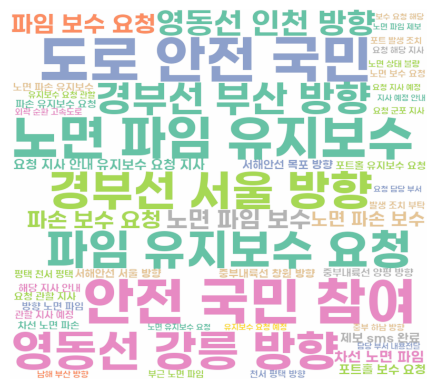

In [10]:
temp1 = pl.DataFrame(get_tf(dfd.filter(pl.col('일자').dt.year() == 2023).to_pandas()[
                     '텍스트'], ngram=(3, 3), topn=50,)).filter(~pl.col('단어').is_in(['고속 도로', '지사 예정', '한국 도로 공사', '한국 도로', '마을 서해안 고속', '안전 국민']))
get_wc(temp1, color_set='Set2')

In [11]:
temp1 = pl.DataFrame(get_tf(dfd.filter((pl.col('일자').dt.year() == 2023) & (pl.col('소스') == '콜센터')).to_pandas()[
                     '텍스트'], ngram=(2, 2), topn=100)).filter(~pl.col('단어').is_in(['고속 도로', '지사 예정', '한국 도로 공사', '한국 도로', '마을 서해안 고속']))
temp1.filter(~pl.col('단어').str.contains('방향|안전|국민|답변|조치|도로 공사')).slice(0, 20)

단어,빈도,선택,출현율
str,i64,i64,f64
"""보수 요청""",2407,1,0.226669
"""노면 파임""",1917,1,0.180525
"""유지보수 요청""",1773,1,0.166965
"""노면 파손""",1056,1,0.099444
"""지사 안내""",1054,1,0.099256
"""파임 유지보수""",695,1,0.065449
"""차선 노면""",668,1,0.062906
"""영동선 강릉""",553,1,0.052076
"""경부선 서울""",552,1,0.051982


In [204]:
temp1.filter(~pl.col('단어').str.contains('방향|안전')).slice(80, 20)

단어,빈도,선택,출현율
str,i64,i64,f64
"""방문 여름철""",358,1,0.068048
"""매연 피해""",358,1,0.068048
"""설정 이해""",358,1,0.068048
"""반대 관계""",358,1,0.068048
"""문제 저녁""",358,1,0.068048
"""설치 반대""",358,1,0.068048
"""매연 한국도로공사""",358,1,0.068048
"""과정 동네""",358,1,0.068048
"""구간 문제""",358,1,0.068048


In [240]:
# 22년 23년 tf 및 wordcloud
with pd.ExcelWriter('전자만 소분류별 키워드.xlsx') as writer:
    for 소분 in 소분류:
        temp1 = get_tf(df.filter((pl.col('소스') == '전자·서면') & (pl.col('일자').dt.year() == 2022) &
                                 (pl.col('소분류') == 소분)).to_pandas()['텍스트'])
        temp2 = get_tf(df.filter((pl.col('소스') == '전자·서면') & (pl.col('일자').dt.year() == 2023) &
                                 (pl.col('소분류') == 소분)).to_pandas()['텍스트'])

        sheet = pd.concat([temp1.reset_index(drop=True)[['단어', '빈도', '출현율']],
                           temp2.reset_index(drop=True)[['단어', '빈도', '출현율']]], axis=1)

        temp_1 = get_wc(temp1)
        temp_1.savefig(f'차트/워드클라우드/{소분}_2022.png')
        temp_1.clf()
        temp_2 = get_wc(temp2)
        temp_2.savefig(f'차트/워드클라우드/{소분}_2023.png')
        temp_2.clf()

        sheet.to_excel(writer, sheet_name=f'{소분}')

<Figure size 640x480 with 0 Axes>

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

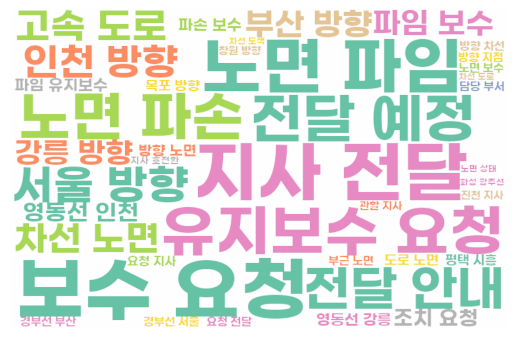

In [253]:
# 22년 23년 tf 및 wordcloud
# temp1 = get_tf(df.filter((pl.col('일자').dt.year() == 2022) &
#                (pl.col('중분류') == '도로')).to_pandas()['텍스트'])
temp2 = get_tf(df.filter((pl.col('일자').dt.year() == 2023) &
               (pl.col('중분류') == '도로')).to_pandas()['텍스트'])

# pd.concat([temp1.reset_index(drop=True)[['단어', '빈도', '출현율']],
#            temp2.reset_index(drop=True)[['단어', '빈도', '출현율']]], axis=1)

temp_2 = get_wc(temp1)
temp_2
# sheet.to_excel(writer, sheet_name=f'{소분}')

In [ ]:
mw = pl.DataFrame(mw)


### 🚚 노선별 언급량 알아보기


In [153]:
노선 = pl.DataFrame(mw).filter(pl.col('일자').dt.year() == 2023).select(['메모']).with_columns(pl.col('메모').str.extract_all(
    r'\b(-?~?\w{2,}선|\w{2,}방향|\w+도로)\b').alias('노선추출'))

In [150]:
노선

메모,노선추출
str,list[str]
"""17해당 위치 호남고속도로…","[""호남고속도로""]"
"""6해당 용봉 IC 출입구 …",null
"""4237 로 문의 하시기바…",null
"""34포트홀 발생* """,null
"""13노면상태 불량:남양주시…",null
""": 기타서울특별시 중랑구 …",null
""": 기타경기도 평택시 청북…",null
""": 기타서울특별시 중랑구 …",null
"""2포트홀이 발생하였습니다.…",null


In [154]:
from collections import defaultdict

route_counts = defaultdict(int)
for routes in 노선.filter(pl.col('노선추출').is_not_null()).select('노선추출').to_series().to_list():
    for route in routes:
        route_counts[route] += 1

sorted_route_counts = dict(
    sorted(route_counts.items(), key=lambda x: x[1], reverse=True))
pl.DataFrame(sorted_route_counts).transpose(
    include_header=True).write_csv('전처리/콜도로별_언급건수.csv')

# pd.DataFrame(sorted_route_counts)

In [164]:
link = pd.read_csv('전처리/도로링크.csv')
links = link['ROAD_NAME'].unique().tolist()
links.sort()
pd.Series(links).to_clipboard(index=False)

### 전체 키워드


노선 추출하는거

1. 글자열에서 00선, 00도로, 00대로 를 모두 추출함
1. 00 도로, 를 모두 00선으로 통일함
1. 서해안 고속도로, 등 도로명에 띄어쓰기가 들어간 경우가 있음


In [40]:
def extract_route(text: str):
    import re
    return re.findall(r'(\w{2,10}선|\w{2,}도로|\w{2,}대로)', text)


def get_route(text: pd.Series | pl.Series = pl.Series(['세종포천선 경부선 경부선', '중부선'])):
    result = pl.Series(text.apply(extract_route).apply(lambda x: list(set(x))))

    from collections import defaultdict
    import re
    route_counts = defaultdict(int)

    for routes in result:
        for route in routes:
            route = re.sub(r'고속도로$', '선', route)
            route_counts[route] += 1
    sorted_route_counts = dict(
        sorted(route_counts.items(), key=lambda x: x[1], reverse=True))
    df = pl.DataFrame(sorted_route_counts).transpose(include_header=True)
    df.columns = ['노선명', '빈도수']  # Set column names as '노선', '빈도수'
    return df.filter(pl.col('노선명').str.n_chars() > 1).sort('빈도수', descending=True)

In [95]:
소언 = {}
소분류 = df['소분류'].unique()
for 소분 in 소분류:
    print(소분)
    소언[소분] = get_route(df.filter((pl.col('일자').dt.year() == 2023)
                                 & (pl.col('소분류') == 소분))['텍스트'])

노면파임
물고임
배수시설
표지판
기타시설물
주행감
교량
통로 및 박스
농로
전광판
차선도색
전기시설
기타
안전시설
방음벽
터널
IC개량


In [44]:
전체언급 = get_route(df['텍스트'])
전체언급 = 전체언급.with_columns(
    pl.when(pl.col('노선명') == '순환선').then('수도권<br>순환선')
    .when(pl.col('노선명') == '외곽선').then('수도권<br>외곽선')
    .otherwise(pl.col('노선명'))
    .alias('노선명')).filter(~pl.col('노선명').str.contains(r'상행|하행|한국'))

#### 전체 민원 중 노선별 언급량 시각화


In [68]:
fig = px.bar(전체언급.head(10), x='노선명', y='빈도수', text='빈도수',)
fig.update_traces(marker_color='black', texttemplate='%{text:,}')
fig.update_layout(call_layout('언급량 상위 10개 도로', unit='건'),
                  xaxis=dict(title=''), yaxis=dict(title=''))

fig.show()

In [43]:
전체언급.write_excel('전처리/노선별언급.xlsx')

In [12]:
노선별 = pd.read_excel('전처리/노선별언급.xlsx')

In [15]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(x=노선별.head(10)['노선명'], y=노선별.head(10)[
              '빈도수'], name='빈도수', marker_color='black', text=노선별.head(10)['빈도수'], textposition='inside'), secondary_y=False)
fig.add_trace(go.Scatter(x=노선별.head(10)['노선명'], y=노선별.head(10)[
              '백만대당 민원'], mode='markers', name='백만대당 민원 건수', marker=dict(color='#CCCCCC', size=10, opacity=1, line=dict(color='#009ae1', width=4), symbol='circle-open'), text=노선별.head(10)['백만대당 민원']), secondary_y=True)
fig.update_layout(call_layout(''), xaxis_title='', yaxis_title='빈도수', yaxis2_title='백만대당 민원 건수',
                  yaxis2=dict(title='백만대당 민원 건수', side='left'), yaxis2_showgrid=False)
# fig.update_traces(textposition='inside')  # bar 차트의 라벨이 마커 안에 보이도록 위치 조정
fig.show()

### 월별 발생량 비교


In [19]:
mo = df.groupby([pl.col('일자').dt.year().alias('연도'), pl.col('일자').dt.month().alias('월'), pl.col('소분류')])\
    .agg(건수=pl.count())\
    .pivot(values='건수', index=['연도', '소분류'], columns='월').sort(['연도', '소분류'])

mo.select(sorted(mo.columns)).to_pandas().to_clipboard(excel=True)

### 토픽모델링

- 각 모델별로 바 차트
- 워드 클라우드 ()
- 워드 클라우드 (노선)
- 토픽모델링


In [13]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# embedding_model='sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
embedding_model = r'D:\2024\텍스트 분석 대시보드\model\ko-sroberta-multitask'

vectorizer = CountVectorizer(max_features=200, ngram_range=(2, 2))

topic_model = BERTopic(embedding_model=embedding_model,
                       vectorizer_model=vectorizer, nr_topics=5, min_topic_size=5, top_n_words=25)

In [30]:
소분류 = df['소분류'].unique().to_list()
소분류

['통로 및 박스',
 '터널',
 '안전시설',
 '기타',
 '전기시설',
 '배수시설',
 '노면파임',
 '차선도색',
 '농로',
 '교량',
 '기타시설물',
 '물고임',
 'IC개량',
 '전광판',
 '주행감',
 '표지판',
 '방음벽']

In [33]:
토픽 = {}
토픽요약 = {}
for 소분 in 소분류:
    texts = df.filter(pl.col('일자').dt.year() == 2023).filter(
        pl.col('소분류') == 소분).select('텍스트').to_series()

    topics, probs = topic_model.fit_transform(texts)

    토픽[소분] = pl.DataFrame(topic_model.get_document_info(
        texts)).select(['Document', 'Topic'])
    토픽요약[소분] = topic_model.get_topic_info(
    )[['Count', 'Name', 'Representation']]

    print(f'{소분} 완료')

통로 및 박스 완료
터널 완료
안전시설 완료
기타 완료
전기시설 완료
배수시설 완료
노면파임 완료
차선도색 완료
농로 완료
교량 완료
기타시설물 완료
물고임 완료
IC개량 완료
전광판 완료
주행감 완료
표지판 완료
방음벽 완료


In [75]:
doc = 토픽['농로']
doc_info = 토픽요약['농로']

with pd.ExcelWriter(r'D:\2024\감사실\토픽\농로_info.xlsx', engine='xlsxwriter') as writer:
    # 각 데이터프레임을 시트로 출력
    doc_info.to_excel(writer, sheet_name="1", index=False)
    doc.sort('Topic').to_pandas().to_excel(writer, sheet_name="2", index=False)

### 월별 증감량 그래프


In [10]:
df

일자,소스,대분류,중분류,소분류,텍스트
datetime[ns],str,str,str,str,str
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""시설""","""전기시설""","""평택 제천 제천 방향 지점…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""도로""","""주행감""","""영동선 강릉 방향 둔내터널…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""도로""","""기타""","""영업소 일반 차로 진입 통…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""도로""","""기타""","""호남선 광주 광산 상각 I…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""도로""","""노면파임""","""서해안선 목포 방향 함평 …"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""시설""","""전기시설""","""완주 장수 장수 방향 진안…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""시설""","""터널""","""밀양 울산선 제약 터널 그…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""시설""","""전기시설""","""수도 순환선 시흥 IC 시…"
2021-01-01 00:00:00,"""콜센터""","""유지보수""","""시설""","""터널""","""서해안선 목포 방향 무안 …"


In [172]:
# df.group_by(pl.col('일자').dt.strftime('%y-%m')).count()
# 전년도 같은 월 대비 증가량을 구하는 코드
증가량 = df.groupby(df['일자'].dt.strftime('%m-%Y')).count().sort('일자')\
        .with_columns(pl.col('count').diff().alias('증감'))\
        .filter(pl.col('일자').str.contains('2023'))\
        .with_columns(pl.col('일자').str.replace(r'-\d{4}', '월').str.replace('^0', ''))

# 평균 선 추가
평균_증감 = 증가량['증감'].mean()
# 값이 500 이상인 데이터에 대해 빨간색으로 마커를 강조
colors = ['black' if value >= 평균_증감 else '#ECECEC' for value in 증가량['증감'].to_list()]


fig = px.bar(증가량, x='일자', y='증감', text='증감')
fig.add_hline(y=평균_증감, line_dash="dash", line_color="blue", annotation_text="평균 증감량", annotation_position="bottom right")
fig.update_traces(marker=dict(color=colors))
fig.update_layout(call_layout('월별 민원 증감량', '22년 대비 23년', unit='건'), xaxis=dict(nticks=13, title = ''), yaxis=dict(title = '', nticks=3))
fig.show()


### 도로 기타 민원 분류 하기

- 민자 국도 문의
- 도로 환경
  - 소음
  - 매연
  - 쓰레기
  -


In [174]:
민자_도로_문의_패턴 = r'민자|국도|일반도로|지자체|'
도로_환경_패턴 = r'쓰레기|매연|소음'

민자_도로_문의 = df.filter((pl.col('소분류') == '기타') & (pl.col('일자').dt.year() == 2023) & (pl.col('텍스트').str.contains(민자_도로_문의_패턴))).select(['일자', '텍스트'])
도로_환경_민원 = df.filter((pl.col('소분류') == '기타') & (pl.col('일자').dt.year() == 2023) & (pl.col('텍스트').str.contains(도로_환경_패턴))).select(['일자', '텍스트'])

In [27]:

temp = df.filter((pl.col('소분류') == '기타') &
                 (pl.col('일자').dt.year() == 2023) &
                   ~(pl.col('텍스트').str.contains(r'서해안|지방|국도|')) &
                  #  (pl.col('텍스트').str.contains(r'민자')) &
                   (pl.col('텍스트').str.contains(r'(\s국도|지자체|지방)'))
                 )\
    .select(['일자', '텍스트'])
temp

일자,텍스트
datetime[ns],str
2023-01-03 00:00:00,"""창원 방향 김천 IC 진입…"
2023-01-05 00:00:00,"""도로 제설 작업 요청 시내…"
2023-01-06 00:00:00,"""구미 영업소 남구 영업소 …"
2023-01-07 00:00:00,"""평택 제천 제천 방향 터널…"
2023-01-07 00:00:00,"""제보 SMS 완료 남해 고…"
2023-01-08 00:00:00,"""도로 노면 파임 불만 지자…"
2023-01-10 00:00:00,"""자유 노면 파손 문의 안내…"
2023-01-10 00:00:00,"""음성 톨게이트 진입 램프구…"
2023-01-10 00:00:00,"""민자 오송 세종 파임 국도…"


In [32]:
temp = df.filter((pl.col('소분류') == '기타') &
                 (pl.col('일자').dt.year() == 2023) &
                 ~(pl.col('텍스트').str.contains(r'\s국도|지자체|지방')) &
                 (pl.col('텍스트').str.contains(r'소음|소리|매연')
                  #   (pl.col('텍스트').str.contains(r'민자')) &
                  )
                 )\
    .select(['텍스트'])
temp

텍스트
str
"""경부선 금오 도로 철판 소…"
"""중앙고속도로 의성 대구 노…"
"""영동선 교차로 고속 도로 …"
"""제보 SMS 완료 경부선 …"
"""통영 대전선 대전 방향 교…"
"""대구 경부선 부산 방향 도…"
"""호남 지선 대전 방향 서대…"
"""남해 지선 장유 터널 부근…"
"""남원 광주 졸음 분간 도로…"


In [38]:
temp = df.filter((pl.col('소분류') == '기타시설물') &
                 (pl.col('일자').dt.year() == 2023) &
                 ~(pl.col('텍스트').str.contains(r'졸음|화장실|단말기|하이패스|통행'))  # &
                  (pl.col('텍스트').str.contains(r'발권|통행|단말기|하이패스|'))
                 )\
    .select(['텍스트'])
temp

텍스트
str
"""경부선 서울 일반 차로 진…"
"""수원시 영업소 일반 차로 …"
"""광명역 부근 가드레일 파손…"
"""호남선 순천 방향 IC 고…"
"""남해 부산 방향 광야 터널…"
"""경기 화물차 군포 이동 발…"
"""이송 기흥 영업소 간판 시…"
"""서초 반포 가로등 관련문의…"
"""서천 공주 공주 방향 표지…"


In [43]:
df.filter((pl.col('일자').dt.year() == 2023) & (pl.col('중분류') != '도로')
          ).write_parquet('전처리/23년유지보수_시설.parquet')

## (240513) 수정사항 반영 하기

- 키워드 바 차트로 만들기


In [13]:
def get_tf(data: pd.Series | list,
           ngram: tuple = (2, 2),
           topn: int = 40,
           include_word: str = '',
           exclude_word: str = ''):
    """_요약_

    Args:
        data (pd.Series): 문자열 시리즈
        ngram (tuple, optional): 엔그람 범위. Defaults to (2,2).
        topn (int, optional): 추출할 단어의 개수. Defaults to 40.

    Returns:
        _type_: _description_
    """
    from sklearn.feature_extraction.text import CountVectorizer
    import numpy as np

    if include_word.strip() != '':
        data = data.to_pandas()[data.str.contains(include_word)]
    if exclude_word.strip() != '':
        data = data.to_pandas()[~data.str.contains(exclude_word)]

    vectorizer = CountVectorizer(
        ngram_range=ngram,
        max_features=2000,)

    X = vectorizer.fit_transform(data)
    term_freq_df = pd.DataFrame({
        '단어': vectorizer.get_feature_names_out(),
        '빈도': X.toarray().sum(axis=0)})\
        .sort_values('빈도', ascending=False).head(topn)
    term_freq_df['선택'] = 1
    term_freq_df['출현율'] = term_freq_df['빈도'].apply(
        lambda x: min(1, x/len(data)))

    return pl.DataFrame(term_freq_df)

In [69]:
def get_wc(tf: pd.DataFrame, color_set: str = 'cividis', background_color: str = 'rgba(236, 236, 236, 10)'):

    from wordcloud import WordCloud
    from matplotlib import pyplot as plt

    wc = WordCloud(font_path=r"Z:\home\02_업무\감사실민원분석\GmarketSansTTFBold.ttf",
                   width=700,
                   height=500,
                   prefer_horizontal=1,
                   random_state=1,
                   background_color=background_color,
                   mode="RGBA",
                   font_step=0.01,
                   colormap=color_set,
                   max_words=100,
                   max_font_size=100)
    wc.generate_from_frequencies(dict(zip(tf['단어'], tf['빈도'])))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    return plt

In [67]:
# 전체 민원 중
temp = get_tf(df.filter(
    (~pl.col('텍스트').str.contains('서해안'))
)['텍스트'], exclude_word='지사|방향|국민|접수|괄호|평택|부탁')

fig = px.bar(temp.head(20), x='빈도', y='단어', orientation='h', )
fig.update_layout(call_layout('', height=500, unit='(건)'),
                  yaxis=dict(categoryorder='total ascending', side='left', title='',))
fig.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

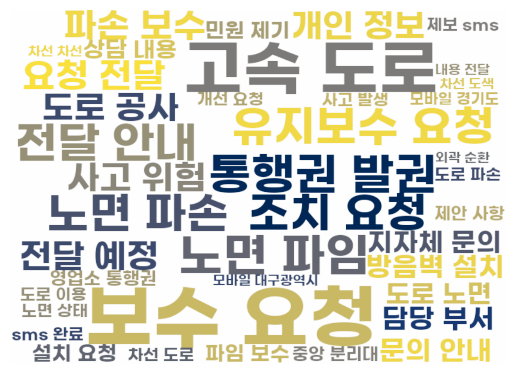

In [70]:
get_wc(temp)

In [78]:
# 전체 민원 중
temp = get_tf(df.filter(
    (~pl.col('텍스트').str.contains('서해안')) &
    (pl.col('중분류') != '도로')
)['텍스트'], exclude_word='지사|방향|국민|접수|괄호|평택|부탁|도로')
temp.select(pl.exclude("선택")).head(25)

단어,빈도,출현율
str,i64,f64
"""통행권 발권""",415,0.133098
"""보수 요청""",341,0.109365
"""조치 요청""",222,0.071199
"""전달 안내""",218,0.069917
"""영업소 통행권""",145,0.046504
"""개인 정보""",124,0.039769
"""유지보수 요청""",119,0.038165
"""전달 예정""",105,0.033675
"""요청 전달""",104,0.033355


In [50]:
fig = px.bar(temp.head(20), x='빈도', y='단어', orientation='h', )
fig.update_layout(call_layout('', height=700),
                  yaxis=dict(categoryorder='total ascending', side='left', title=''))
fig.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

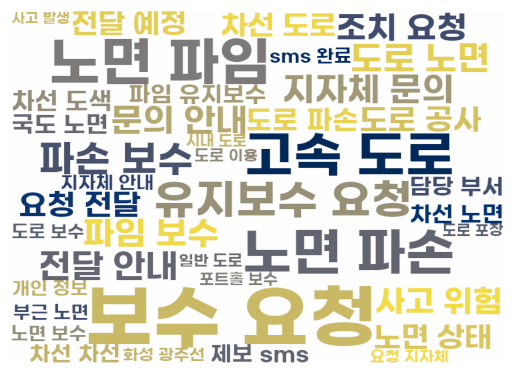

In [61]:
get_wc(temp, )

In [62]:
# 전체 민원 중
temp = get_tf(df.filter(
    (~pl.col('텍스트').str.contains('서해안')) &
    (pl.col('중분류') != '도로')
)['텍스트'], exclude_word='지사|방향|국민|접수|괄호|부탁|도로')

In [45]:
fig = px.bar(temp.head(20), x='빈도', y='단어', orientation='h', )
fig.update_layout(call_layout('', height=700),
                  yaxis=dict(categoryorder='total ascending', side='left', title=''))
fig.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

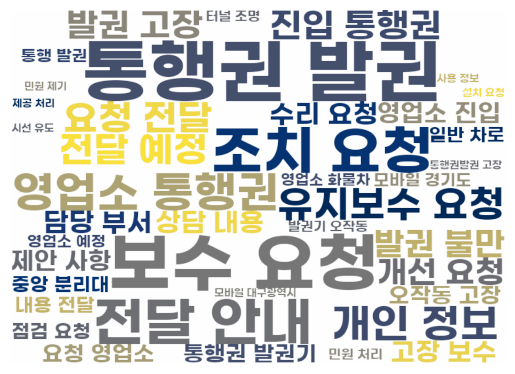

In [63]:
get_wc(temp, )